In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('git_log_processed.csv')

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by timestamp
df = df.sort_values(by='timestamp')

In [354]:
# filter out auuthors and their commits that dont have that many commits 
author_commit_counts = df['author'].value_counts()
authors_to_keep = author_commit_counts[author_commit_counts > 500].index
df = df[df['author'].isin(authors_to_keep)]

df

,hash,release,message,timestamp,author,change_type
24686,07122f0ad9bab9ceb02e4412373e7491c40a9b7d,(tag: 4.0.0),fix(upgrade): populate upgraded component's vi...,2017-03-07 17:32:52+00:00,George Kalpakas,fix
24658,920b3d259d47f60994b62d766fd9ebd89602e4dc,(tag: 4.0.0),feat(aio): support @angular/service-worker usi...,2017-03-10 22:05:29+00:00,Alex Rickabaugh,feat
24638,71cd2957f7e91dede2f4233cbc21f7f121d3954d,(tag: 4.0.0),ci: add wardbell and gkalpak to aio approvers ...,2017-03-13 16:34:40+00:00,Pete Bacon Darwin,ci
24637,fa1920a02b7094cb6fb13594e077d54bf0b305e5,(tag: 4.0.0),feat(aio): enable deep-linking on deployed app...,2017-03-13 16:35:16+00:00,George Kalpakas,feat
24635,0e2dd76c3b81ee11e722914a4fde2ebf230bfb9e,(tag: 4.0.0),build: remove obsolete `ci-lite/` directory an...,2017-03-13 17:29:45+00:00,George Kalpakas,build
...,...,...,...,...,...,...
4,d504452e2f193d3b494a0b2944cddb028c0a2231,(tag: 18.2.10),fix(migrations): properly replace imports acro...,2024-10-29 17:07:01+00:00,Pawel Kozlowski,fix
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
2,dcd16b43f31177a269317f7764ef38559b14fd66,(tag: 18.2.10),refactor(migrations): Make the explicit standa...,2024-10-29 22:04:20+00:00,Matthieu Riegler,refactor
1,48eac2320d66bca2b07d29f65b15636f4abadb50,(tag: 18.2.10),release: cut the v18.2.10 release,2024-10-30 19:03:32+00:00,Alex Rickabaugh,release


In [355]:
# Calculate time differences for each author
df['time_diff'] = (
    df.groupby('author')['timestamp']
    .diff()  # Calculate differences within each author group
    .dt.total_seconds()  # Convert timedelta to total seconds
)


# change time diff to days
df['time_diff'] = df['time_diff'] / (24 * 60 * 60)

df


,hash,release,message,timestamp,author,change_type,time_diff
24686,07122f0ad9bab9ceb02e4412373e7491c40a9b7d,(tag: 4.0.0),fix(upgrade): populate upgraded component's vi...,2017-03-07 17:32:52+00:00,George Kalpakas,fix,NaN
24658,920b3d259d47f60994b62d766fd9ebd89602e4dc,(tag: 4.0.0),feat(aio): support @angular/service-worker usi...,2017-03-10 22:05:29+00:00,Alex Rickabaugh,feat,NaN
24638,71cd2957f7e91dede2f4233cbc21f7f121d3954d,(tag: 4.0.0),ci: add wardbell and gkalpak to aio approvers ...,2017-03-13 16:34:40+00:00,Pete Bacon Darwin,ci,NaN
24637,fa1920a02b7094cb6fb13594e077d54bf0b305e5,(tag: 4.0.0),feat(aio): enable deep-linking on deployed app...,2017-03-13 16:35:16+00:00,George Kalpakas,feat,5.960000
24635,0e2dd76c3b81ee11e722914a4fde2ebf230bfb9e,(tag: 4.0.0),build: remove obsolete `ci-lite/` directory an...,2017-03-13 17:29:45+00:00,George Kalpakas,build,0.037836
...,...,...,...,...,...,...,...
4,d504452e2f193d3b494a0b2944cddb028c0a2231,(tag: 18.2.10),fix(migrations): properly replace imports acro...,2024-10-29 17:07:01+00:00,Pawel Kozlowski,fix,0.088889
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix,4.194016
2,dcd16b43f31177a269317f7764ef38559b14fd66,(tag: 18.2.10),refactor(migrations): Make the explicit standa...,2024-10-29 22:04:20+00:00,Matthieu Riegler,refactor,0.011840
1,48eac2320d66bca2b07d29f65b15636f4abadb50,(tag: 18.2.10),release: cut the v18.2.10 release,2024-10-30 19:03:32+00:00,Alex Rickabaugh,release,5.827292


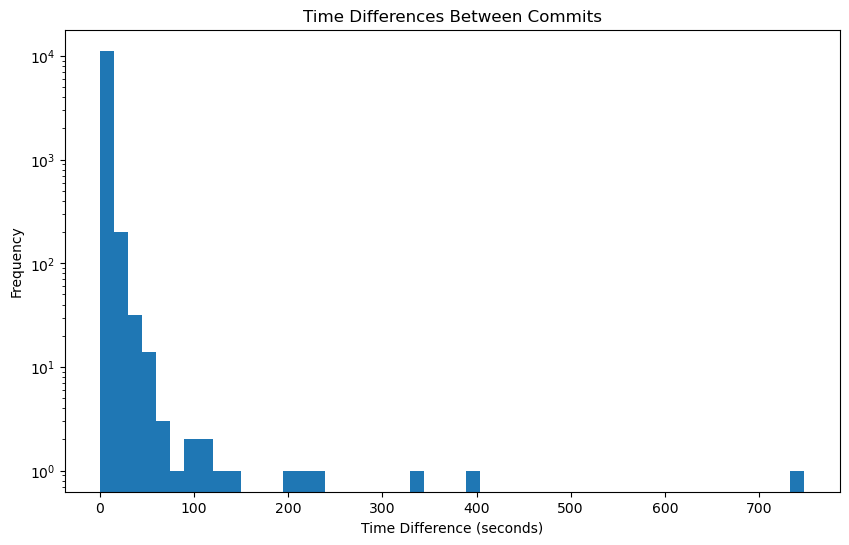

In [356]:
# show time diff distribution
plt.figure(figsize=(10, 6))
df['time_diff'].dropna().plot(kind='hist', bins=50, logy=True)
plt.title('Time Differences Between Commits')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

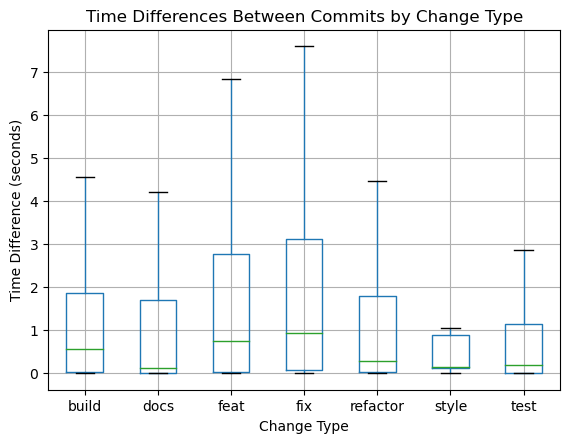

In [357]:
# show distribution of time difference per change type
# ignore not found and chore
plt.figure(figsize=(10, 6))
df[df['change_type'].isin(['feat', 'fix', 'refactor', 'style', 'test','docs', 'build'])].boxplot(column='time_diff', by='change_type', showfliers=False)
plt.title('Time Differences Between Commits by Change Type')
plt.suptitle('')  # Suppress the titles generated by pandas
plt.xlabel('Change Type')
plt.ylabel('Time Difference (seconds)')
plt.show()



In [358]:


longest_gaps_by_author = df.groupby('author')['time_diff'].max().sort_values(ascending=False)


longest_gaps_by_author = df.loc[df.groupby('author')['time_diff'].idxmax()]

# order by time diff
longest_gaps_by_author = longest_gaps_by_author.sort_values(by='time_diff', ascending=False)

longest_gaps_by_author[['hash', 'author', 'timestamp', 'time_diff', 'change_type']]




,hash,author,timestamp,time_diff,change_type
7321,3616d7eb59f95afeabd3d2d8c10e369788c3a5bc,Pawel Kozlowski,2022-03-31 14:24:18+00:00,748.136470,refactor
20501,7a1fdde69e92c313b0ca328d663466f02c6f978f,Paul Gschwendtner,2018-07-23 20:36:24+00:00,403.395926,build
18136,f45684ff95418f3d72ba0069209a96cd7ee5fd02,Joey Perrott,2019-03-04 15:31:29+00:00,339.666042,ci
14001,ef9d3ccf50944393bbf763dd1961c17c5351e735,Renovate Bot,2020-03-11 19:50:15+00:00,226.986481,chore
12053,7849fdde09be38b09c939a4ac033861daf52ca4e,Kristiyan Kostadinov,2020-09-12 12:33:06+00:00,221.632975,feat
22134,b773a4ab980aa5155a259ad7da3eef1184f194f6,Alan Agius,2018-01-10 09:45:05+00:00,127.613935,docs
3828,232a8c1b8dadf3f886b4bd0142613d116c865759,Andrew Scott,2023-08-07 17:41:34+00:00,100.958461,fix
22133,71dd92bbb846bc7e8d705514ef02b05820f5542f,Pete Bacon Darwin,2018-01-10 10:41:15+00:00,64.695324,style
5461,631200314b672745bb69eee04874e25b9f0655d9,Alex Rickabaugh,2022-12-20 16:46:21+00:00,53.313993,refactor
9117,2cdf0740341822a87dc8d9de73728e991e8c3505,Andrew Kushnir,2021-07-12 21:58:35+00:00,40.163796,refactor


In [359]:
import pandas as pd
import numpy as np

# Function to classify commits as Low-Effort or High-Effort
def classify_commit(message):
    if message.startswith(('docs:', 'chore:', 'style:')):
        return 'Low-Effort'
    elif message.startswith(('fix:', 'feat:', 'refactor:')):
        return 'High-Effort'
    return 'Uncategorized'

# Add a new column to classify commits
df['effort_category'] = df['message'].apply(classify_commit)

# Calculate time differences for each author
df['time_diff'] = (
    df.groupby('author')['timestamp']
    .diff()  # Calculate differences within each author group
    .dt.total_seconds()  # Convert timedelta to total seconds
)

# change time diff to days
df['time_diff'] = df['time_diff'] / (24 * 60 * 60)

# Filter out Low-Effort commits with a time difference greater than 1 month (30 days)
one_month_seconds = 30 * 24 * 3600
one_month_days = 30
filtered_df = df[
    (df['effort_category'] == 'High-Effort') |
    ((df['effort_category'] == 'Low-Effort') & (df['time_diff'] <= 3* one_month_days))
]

# Display filtered DataFrame
print(filtered_df[['timestamp', 'author', 'effort_category', 'time_diff']].head())

# Count commits in each effort category for the filtered DataFrame
filtered_effort_counts = filtered_df['effort_category'].value_counts()

# display the ones with most time diff
longest_gaps_by_author = filtered_df.groupby('author')['time_diff'].max().sort_values(ascending=False)

longest_gaps_by_author = filtered_df.loc[filtered_df.groupby('author')['time_diff'].idxmax()]

longest_gaps_by_author[['hash', 'author', 'timestamp', 'time_diff', 'change_type']]




                      timestamp           author effort_category  time_diff
23718 2017-06-08 22:13:37+00:00  Alex Rickabaugh      Low-Effort   0.006424
23696 2017-06-09 23:11:29+00:00  Alex Rickabaugh      Low-Effort   0.005093
23683 2017-06-12 17:59:29+00:00  Alex Rickabaugh     High-Effort   2.783333
23673 2017-06-12 22:36:19+00:00  Alex Rickabaugh      Low-Effort   0.000162
23563 2017-06-22 13:26:06+00:00  Pawel Kozlowski     High-Effort   0.034225


,hash,author,timestamp,time_diff,change_type
6819,9f5558cb2ad6ced4f7604fe7ffb41d4d58fd011c,Alan Agius,2022-06-06 08:04:01+00:00,65.834433,docs
8263,509b14536abe5c8ab086a8be2e1fb7d4c70035a0,Alex Rickabaugh,2021-10-29 22:30:32+00:00,23.042384,docs
8774,51149ab5307d58739fea56583d95c286da425428,Andrew Kushnir,2021-09-09 00:34:32+00:00,28.297627,docs
7904,4f7a838e9d0d1c59a18839ecc9b8db8e0927490e,Andrew Scott,2021-12-16 23:10:26+00:00,16.218993,docs
2605,8a46a33e9cd8f69089ad3516e047aef9f0895be6,Angular Robot,2023-12-07 17:35:40+00:00,10.061725,docs
7868,00cc0d937b229a4b73a61d70259c64e5793d4222,George Kalpakas,2022-01-03 16:30:28+00:00,20.320208,build
1477,a5b5b7d5ef84b9852d2115dd7a764f4ab3299379,Joey Perrott,2024-04-17 17:57:53+00:00,29.108171,refactor
15898,7f6429d802f0fbebd3b8d3489df86912b5b779b0,Kristiyan Kostadinov,2019-10-04 07:38:51+00:00,21.870787,refactor
3111,64399b26c04e1b36911fbeb58dd1e1a1c78a3ea6,Matthieu Riegler,2023-10-23 14:23:28+00:00,15.776910,docs
3509,3b46066ff00619c9d55d53eb7a11cbae658314d7,Paul Gschwendtner,2023-09-14 13:28:15+00:00,17.102824,refactor


In [360]:
# what are on average time difference per change type
average_time_diff = filtered_df.groupby('change_type')['time_diff'].mean()

# order from highest to lowest
average_time_diff = average_time_diff.sort_values(ascending=False)

average_time_diff



change_type
feat        15.755786
build        5.296565
refactor     1.961125
docs         1.945456
fix          1.011092
ci           0.734635
Name: time_diff, dtype: float64

<Figure size 1000x600 with 0 Axes>

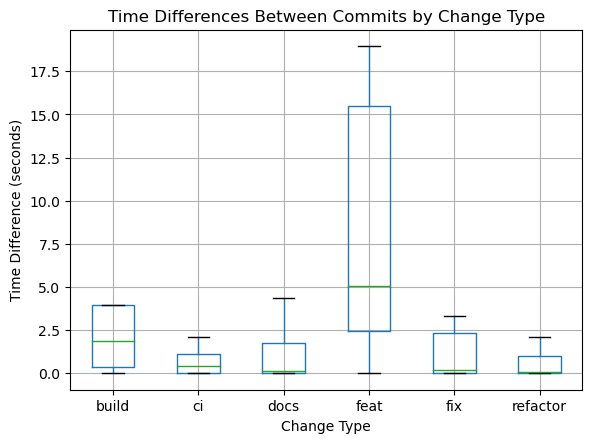

In [361]:
# show distribution of time difference per change type
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='time_diff', by='change_type', showfliers=False)
plt.title('Time Differences Between Commits by Change Type')
plt.suptitle('')  # Suppress the titles generated by pandas
plt.xlabel('Change Type')
plt.ylabel('Time Difference (seconds)')
plt.show()


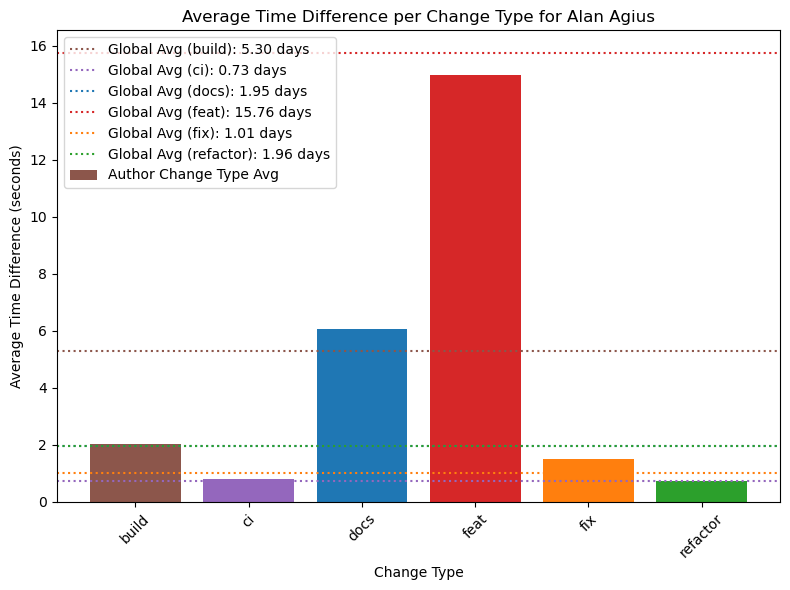

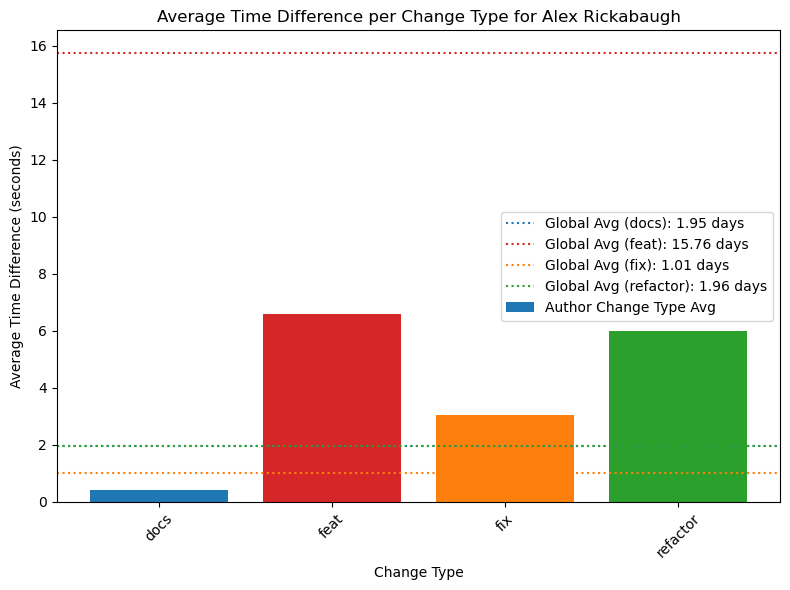

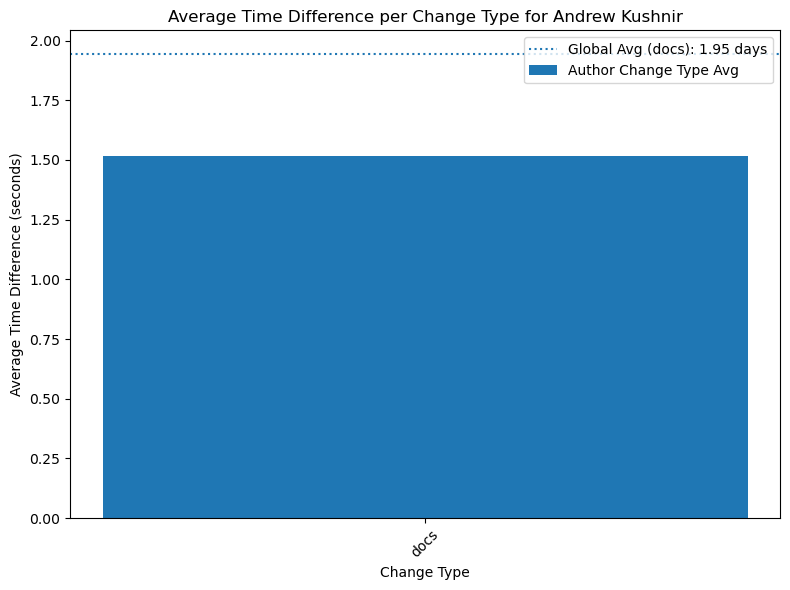

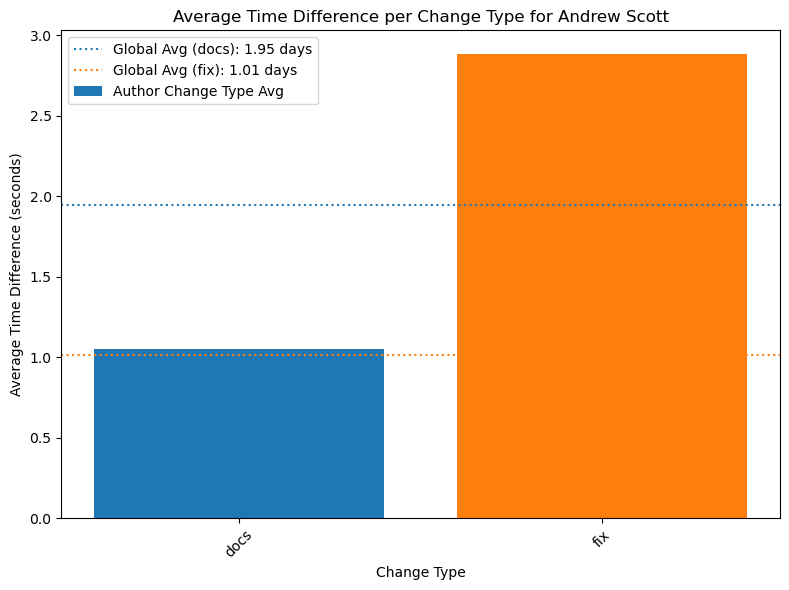

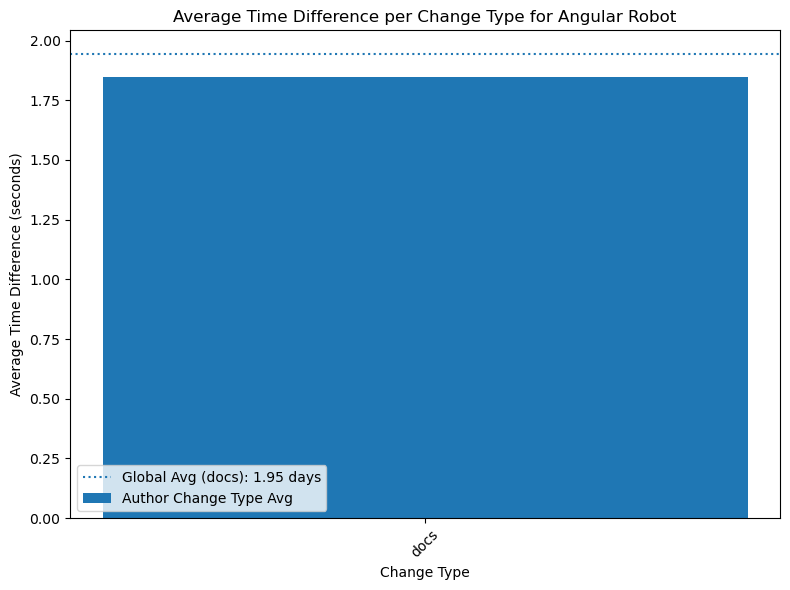

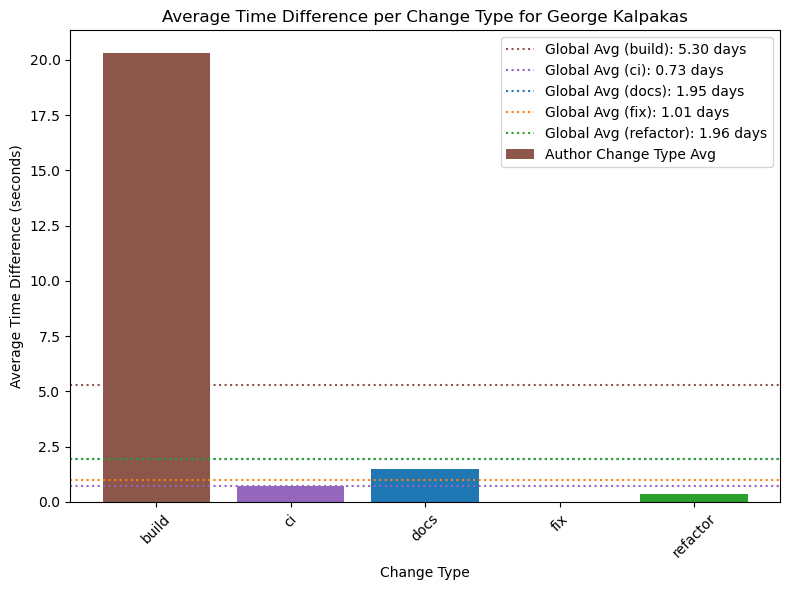

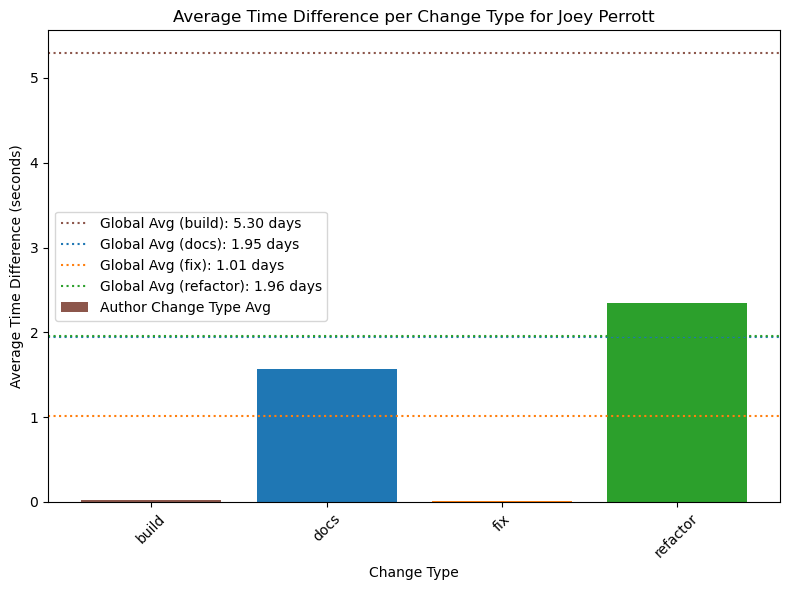

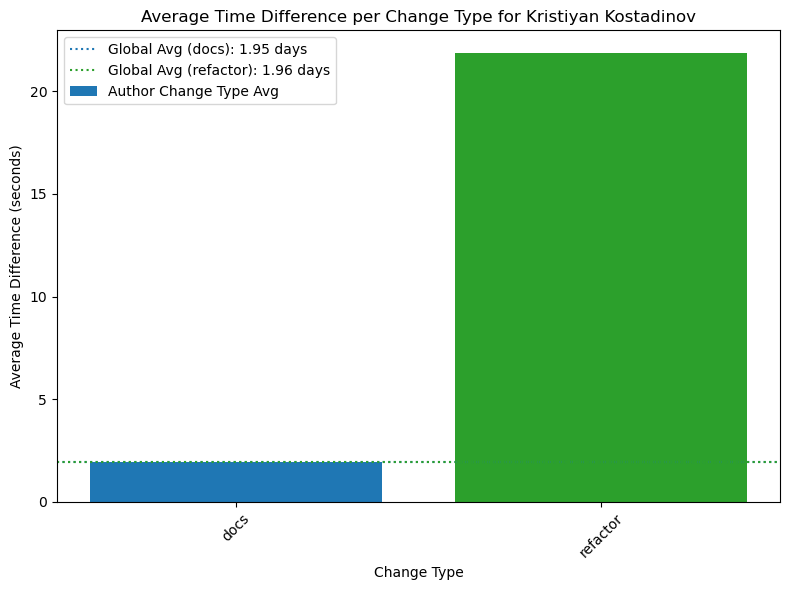

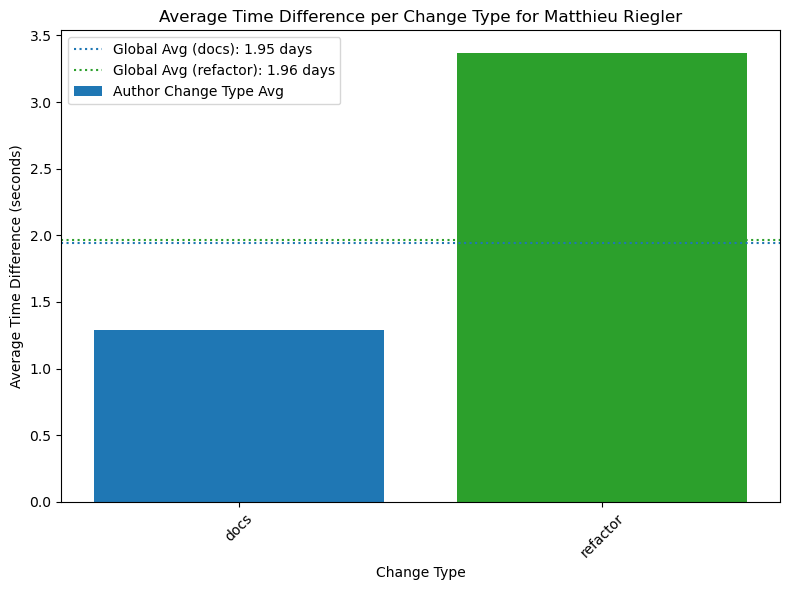

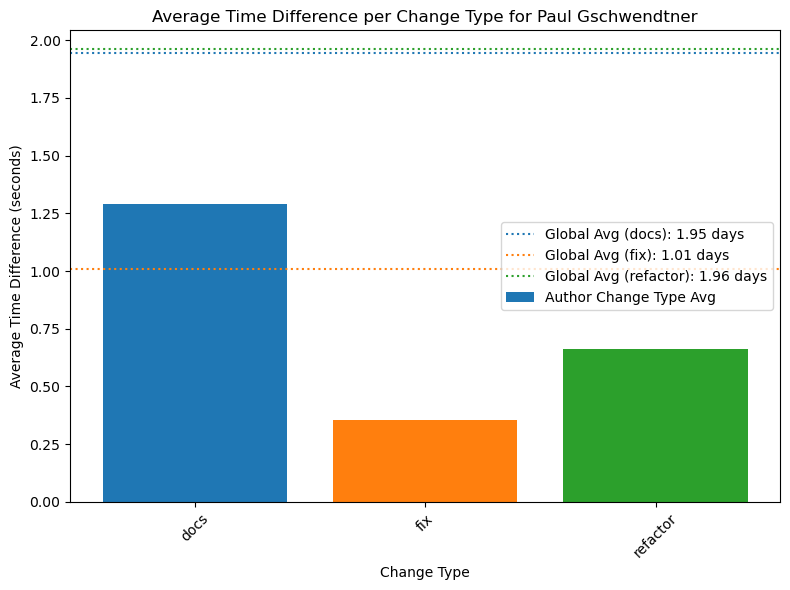

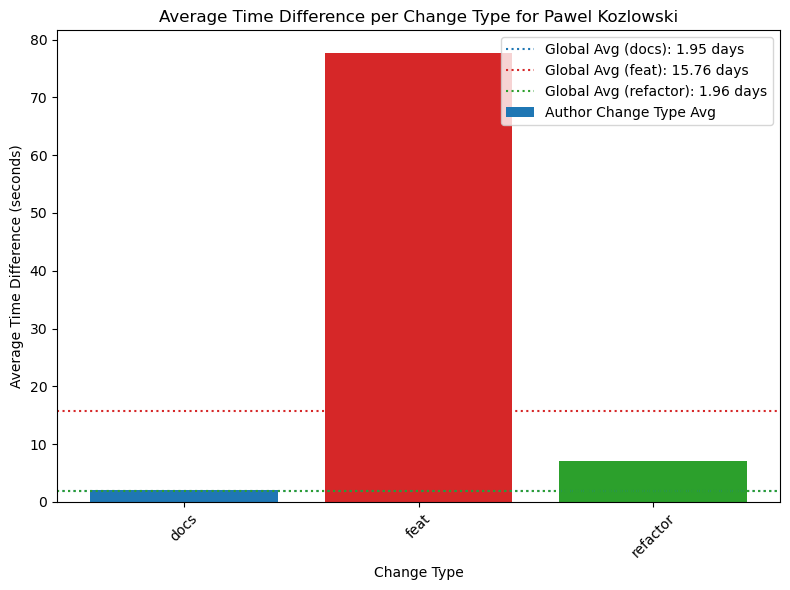

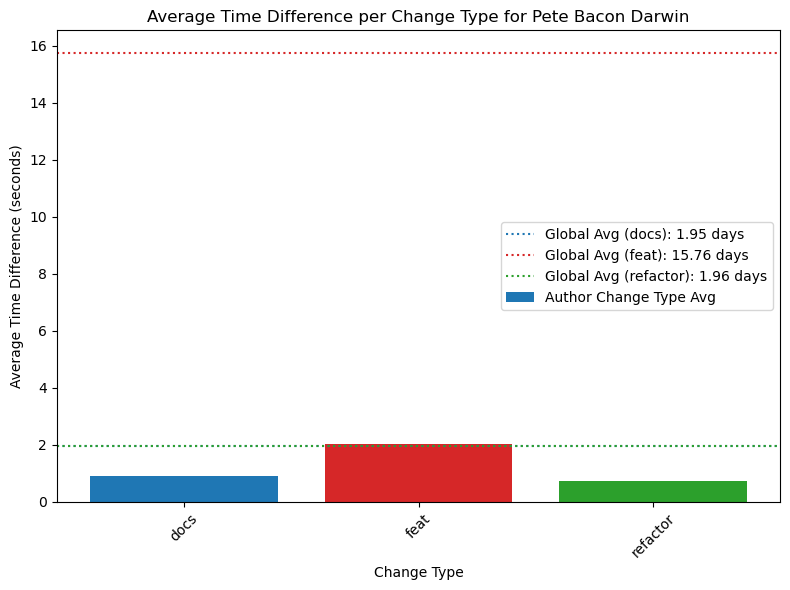

In [364]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group by author, then change type, and calculate average time difference
author_change_type_avg = (
    filtered_df.groupby(['author', 'change_type'])['time_diff']
    .mean()
    .reset_index()
)

# # Calculate overall average time difference for each author
# author_avg_time = filtered_df.groupby('author')['time_diff'].mean()

# Calculate overall average time difference per change type (across all authors)
change_type_avg_time = filtered_df.groupby('change_type')['time_diff'].mean()

# Assign unique colors to each change type
unique_change_types = filtered_df['change_type'].unique()
color_map = {change_type: color for change_type, color in zip(unique_change_types, cm.tab10.colors)}

# Iterate through each author and plot their average time differences per change type
for author, author_df in author_change_type_avg.groupby('author'):
    plt.figure(figsize=(8, 6))
    
    # Bar chart for the author's average time difference per change type with colors
    plt.bar(
        author_df['change_type'],
        author_df['time_diff'],
        color=[color_map[change_type] for change_type in author_df['change_type']],
        label='Author Change Type Avg'
    )
    
    # # Add a horizontal line for the author's overall average time difference
    # overall_avg_author = author_avg_time[author]
    # plt.axhline(overall_avg_author, color='red', linestyle='--', label=f'Overall Author Avg: {overall_avg_author:.2f}s')
    
    # Add horizontal lines for the global average of each change type using the same colors
    for change_type, avg_time in change_type_avg_time.items():
        if change_type in author_df['change_type'].values:
            plt.axhline(
                y=avg_time,
                color=color_map[change_type],  # Use the same color as the bar
                linestyle=':',
                label=f'Global Avg ({change_type}): {avg_time:.2f} days'
            )
    
    # Add title and labels
    plt.title(f'Average Time Difference per Change Type for {author}')
    plt.xlabel('Change Type')
    plt.ylabel('Average Time Difference (seconds)')
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Ensure layout is tight
    plt.tight_layout()
    plt.show()


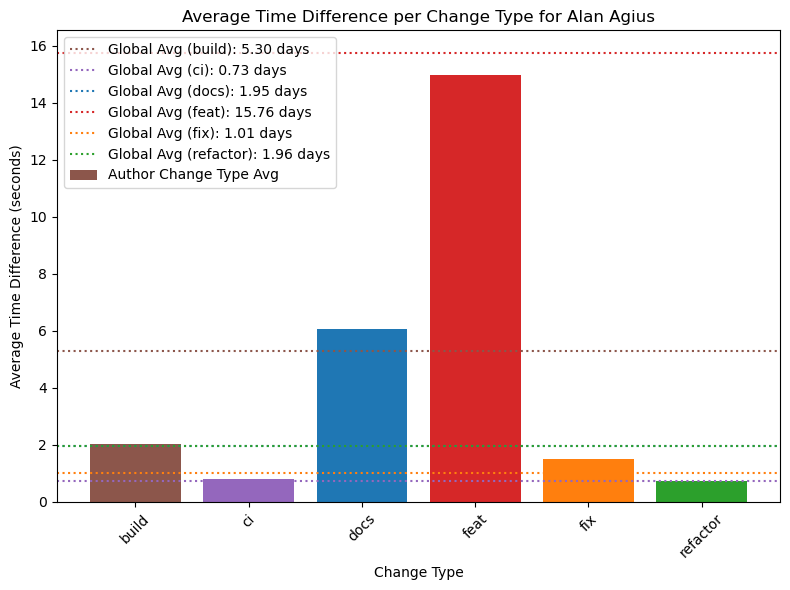

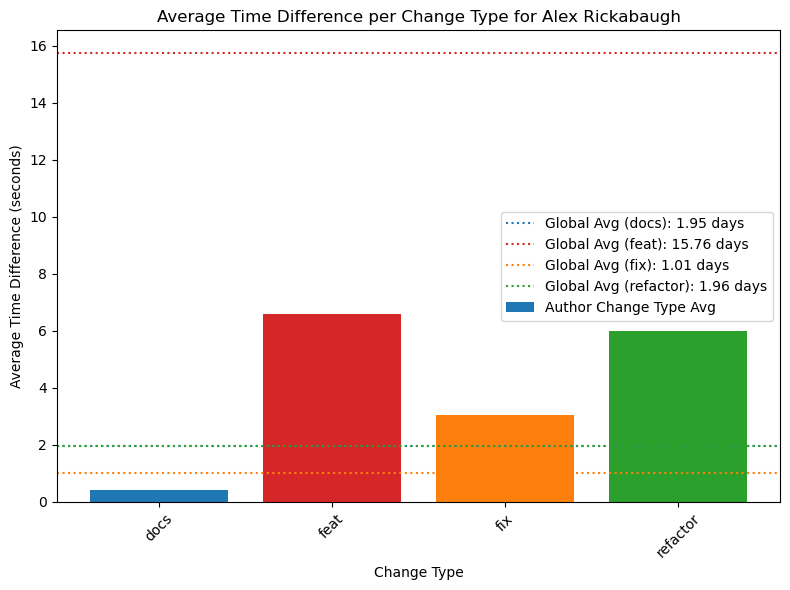

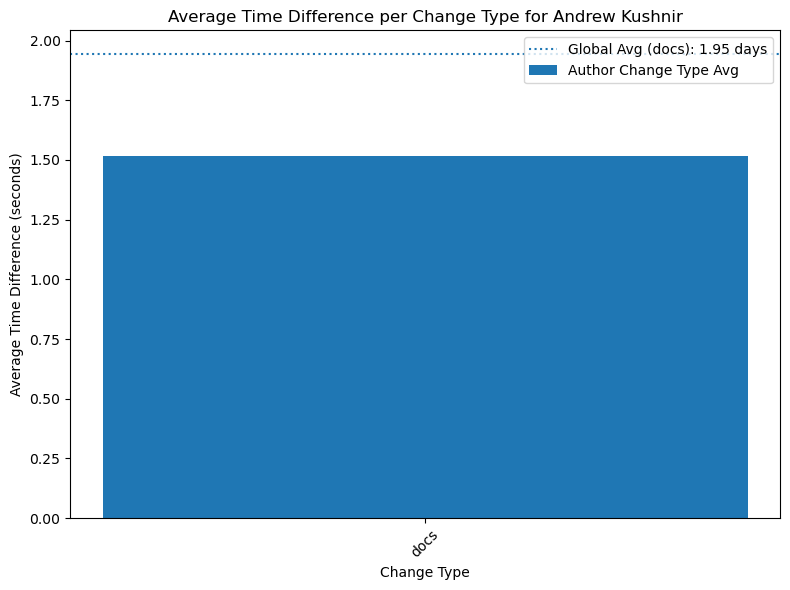

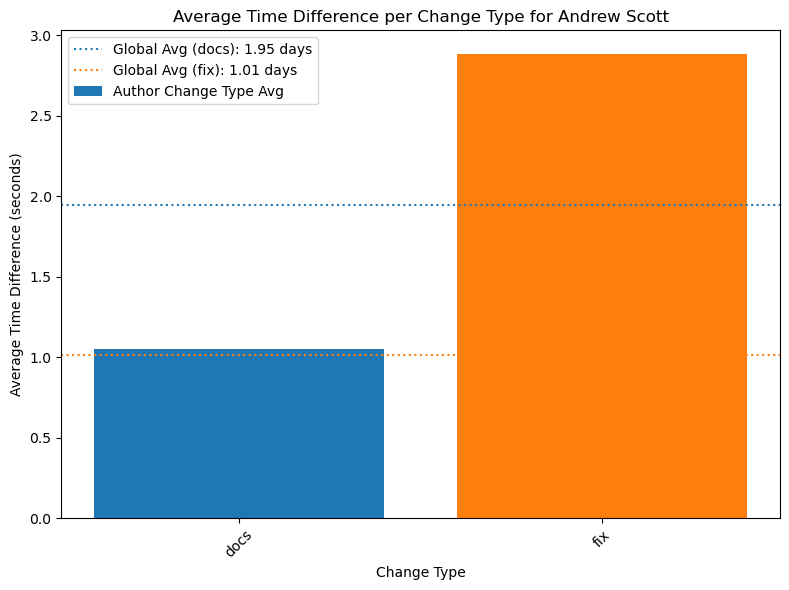

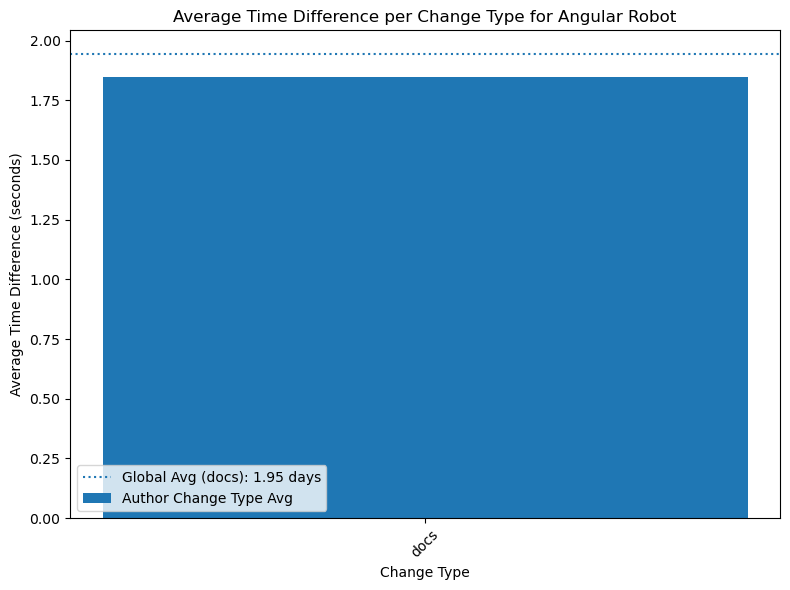

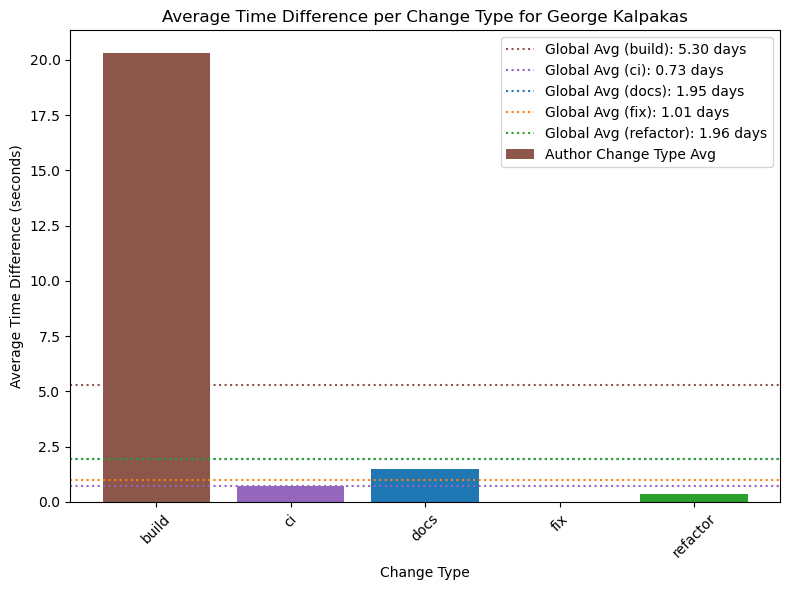

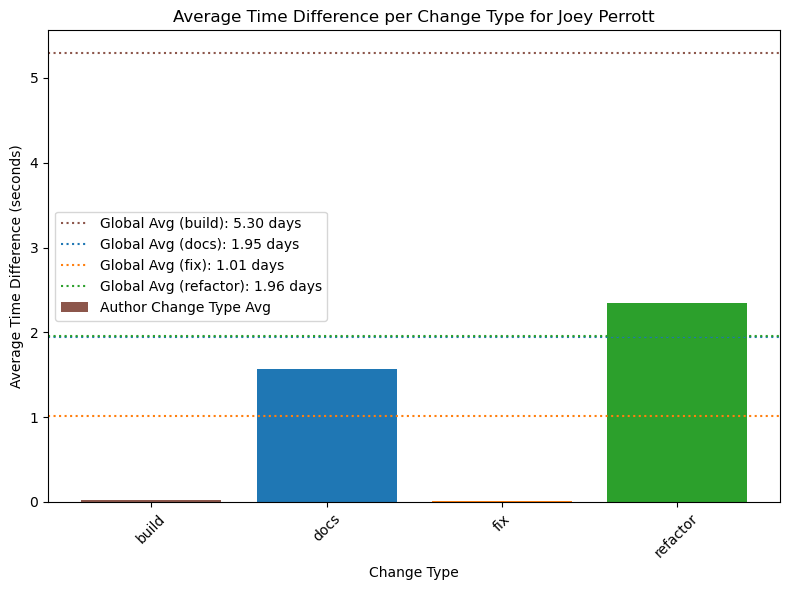

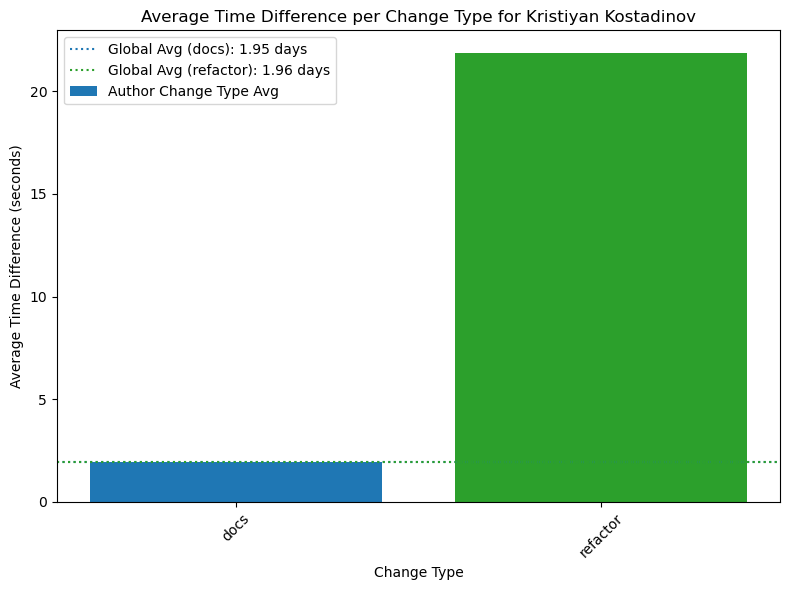

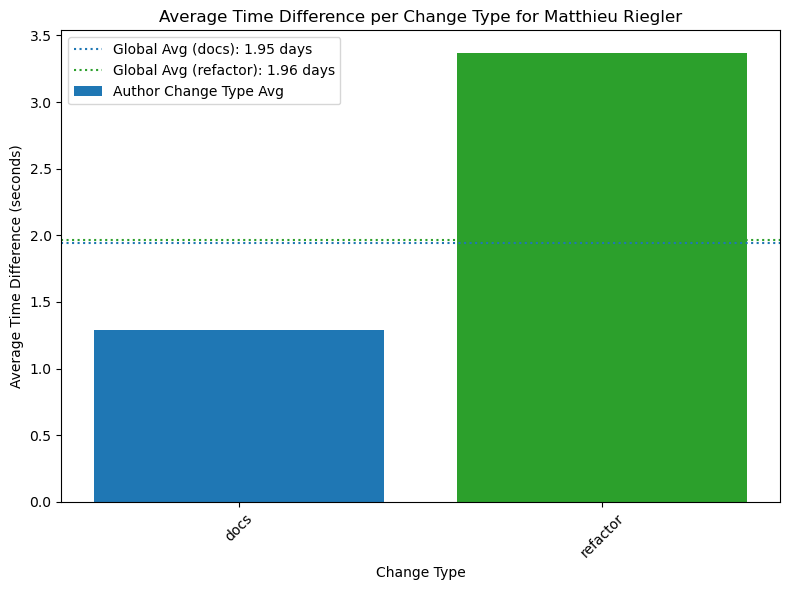

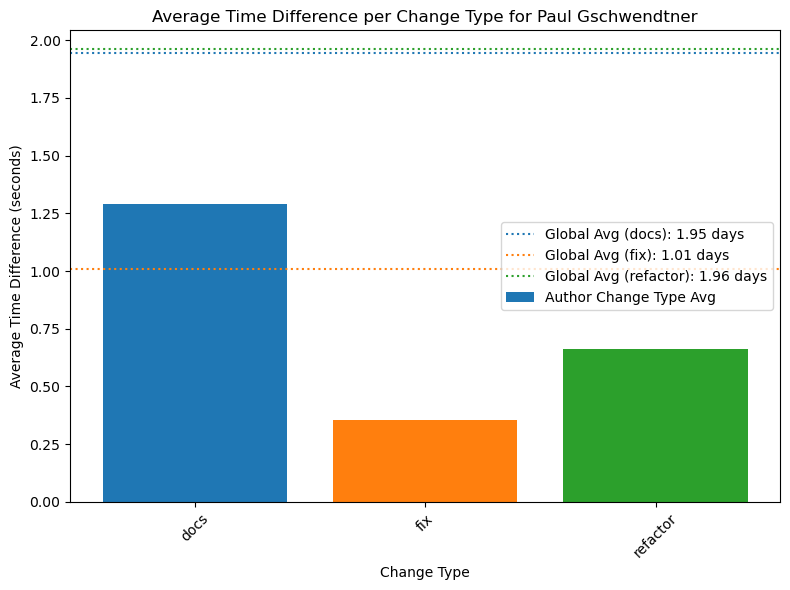

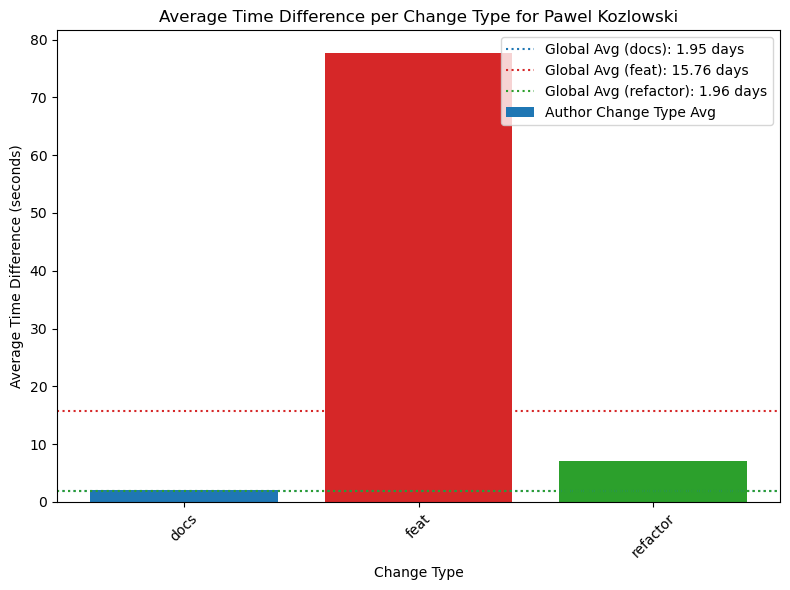

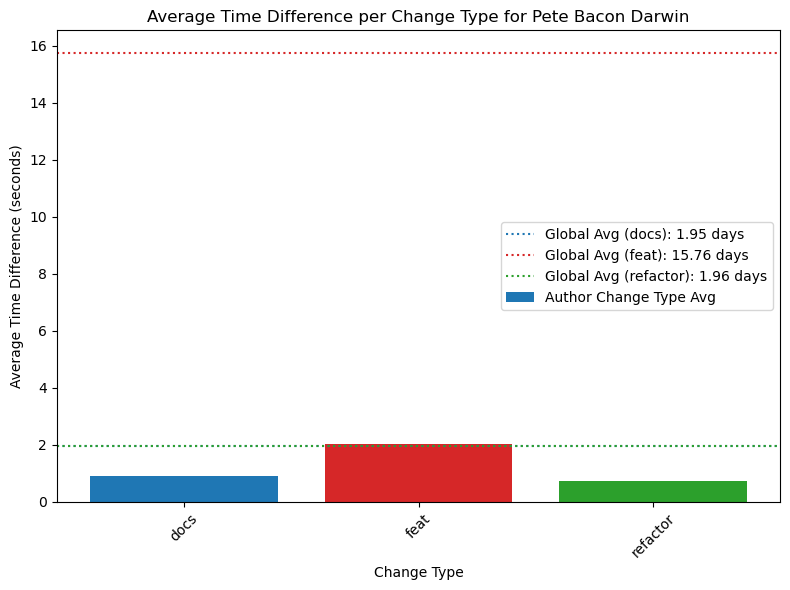

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group by author, then change type, and calculate average time difference
author_change_type_avg = (
    filtered_df.groupby(['author', 'change_type'])['time_diff']
    .mean()
    .reset_index()
)

# # Calculate overall average time difference for each author
# author_avg_time = filtered_df.groupby('author')['time_diff'].mean()

# Calculate overall average time difference per change type (across all authors)
change_type_avg_time = filtered_df.groupby('change_type')['time_diff'].mean()

# Assign unique colors to each change type
unique_change_types = filtered_df['change_type'].unique()
color_map = {change_type: color for change_type, color in zip(unique_change_types, cm.tab10.colors)}

# Iterate through each author and plot their average time differences per change type
for author, author_df in author_change_type_avg.groupby('author'):
    plt.figure(figsize=(8, 6))
    
    # Bar chart for the author's average time difference per change type with colors
    plt.bar(
        author_df['change_type'],
        author_df['time_diff'],
        color=[color_map[change_type] for change_type in author_df['change_type']],
        label='Author Change Type Avg'
    )
    
    # # Add a horizontal line for the author's overall average time difference
    # overall_avg_author = author_avg_time[author]
    # plt.axhline(overall_avg_author, color='red', linestyle='--', label=f'Overall Author Avg: {overall_avg_author:.2f}s')
    
    # Add horizontal lines for the global average of each change type using the same colors
    for change_type, avg_time in change_type_avg_time.items():
        if change_type in author_df['change_type'].values:
            plt.axhline(
                y=avg_time,
                color=color_map[change_type],  # Use the same color as the bar
                linestyle=':',
                label=f'Global Avg ({change_type}): {avg_time:.2f} days'
            )
    
    # Add title and labels
    plt.title(f'Average Time Difference per Change Type for {author}')
    plt.xlabel('Change Type')
    plt.ylabel('Average Time Difference (seconds)')
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Ensure layout is tight
    plt.tight_layout()
    plt.show()
